In [57]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_curve


import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential 
from keras.layers import Dense, Input

import warnings

In [58]:
warnings.filterwarnings(action='ignore')

Download dataset and load dataset with dataframe

For more info about dataset specification, visit the Kaggle site 

https://www.kaggle.com/code/girishvutukuri/exercise-insurance-fraud
    

In [59]:
tc = pd.read_csv('../../data/insurance/TrainData/TrainData/Train_Claim.csv')
target = pd.read_csv('../../data/insurance/TrainData/TrainData/Traindata_with_Target.csv')
demo = pd.read_csv('../../data/insurance/TrainData/TrainData/Train_Demographics.csv')

In [60]:
# Target is label data whether fraud or not.

target

,CustomerID,ReportedFraud
0,Cust20065,N
1,Cust37589,N
2,Cust24312,N
3,Cust5493,Y
4,Cust7704,Y
...,...,...
28831,Cust9773,N
28832,Cust38439,N
28833,Cust38444,N
28834,Cust26466,N


In [61]:
# tc dataframe is features which will be trained and tested.

tc

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage
0,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,3,?,1,0,?,65501,13417,6071,46013
1,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10,3,YES,2,1,YES,61382,15560,5919,39903
2,Cust10002,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22,1,YES,2,3,NO,66755,11630,11630,43495
3,Cust10003,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22,1,YES,2,3,NO,66243,12003,12003,42237
4,Cust10004,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10,1,NO,2,1,YES,53544,8829,7234,37481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28831,Cust9993,2015-01-24,Vehicle Theft,?,Trivial Damage,Police,State9,City4,Location 1890,3,1,NO,0,3,?,6590,870,1078,4642
28832,Cust9994,2015-02-09,Single Vehicle Collision,Front Collision,Minor Damage,Fire,State8,City3,Location 2097,17,1,YES,0,2,YES,74547,14699,7875,51973
28833,Cust9996,2015-01-28,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State9,City7,Location 1452,1,1,YES,2,0,YES,55305,7043,7043,41219
28834,Cust9997,2015-01-28,Single Vehicle Collision,Rear Collision,Minor Damage,Ambulance,State9,City3,Location 1876,1,1,?,2,0,YES,55830,7059,7059,41712


In [62]:
# To merge tc(feautures) and target as dataframe named 'data'

tc = tc.sort_values('CustomerID')

target = target.sort_values('CustomerID')

data = pd.merge(tc, target, how='inner')
data.shape

(28836, 20)

In [63]:
data.isnull().sum()

CustomerID               0
DateOfIncident           0
TypeOfIncident           0
TypeOfCollission         0
SeverityOfIncident       0
AuthoritiesContacted     0
IncidentState            0
IncidentCity             0
IncidentAddress          0
IncidentTime             0
NumberOfVehicles         0
PropertyDamage           0
BodilyInjuries           0
Witnesses                0
PoliceReport             0
AmountOfTotalClaim       0
AmountOfInjuryClaim      0
AmountOfPropertyClaim    0
AmountOfVehicleDamage    0
ReportedFraud            0
dtype: int64

### Preprocessing 

In [64]:
# Removing string in data['CustomeID'] seriees

cust_name  = data['CustomerID'].str.split("Cust", n=1, expand=True )
cust_name.columns = ['nan', 'CustomerID']
cust_name = cust_name[['CustomerID']]
cust_name

,CustomerID
0,10000
1,10001
2,10002
3,10003
4,10004
...,...
28831,9993
28832,9994
28833,9996
28834,9997


In [65]:
# Replace numeric customerID processed as above with original data 

data.drop('CustomerID', axis=1, inplace=True)
data.insert(0, 'CustomerID', cust_name)
data['CustomerID'].astype(np.int32)
data

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,ReportedFraud
0,10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,3,?,1,0,?,65501,13417,6071,46013,N
1,10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10,3,YES,2,1,YES,61382,15560,5919,39903,N
2,10002,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22,1,YES,2,3,NO,66755,11630,11630,43495,N
3,10003,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22,1,YES,2,3,NO,66243,12003,12003,42237,N
4,10004,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10,1,NO,2,1,YES,53544,8829,7234,37481,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28831,9993,2015-01-24,Vehicle Theft,?,Trivial Damage,Police,State9,City4,Location 1890,3,1,NO,0,3,?,6590,870,1078,4642,N
28832,9994,2015-02-09,Single Vehicle Collision,Front Collision,Minor Damage,Fire,State8,City3,Location 2097,17,1,YES,0,2,YES,74547,14699,7875,51973,N
28833,9996,2015-01-28,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State9,City7,Location 1452,1,1,YES,2,0,YES,55305,7043,7043,41219,N
28834,9997,2015-01-28,Single Vehicle Collision,Rear Collision,Minor Damage,Ambulance,State9,City3,Location 1876,1,1,?,2,0,YES,55830,7059,7059,41712,N


In [66]:
data.shape

(28836, 20)

### List all columns which need one-hot-encoding

In [67]:
# Applying One hot encoding for categorical data by Pandas get_dummies library
data_label = ['TypeOfIncident', 'TypeOfCollission',
       'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState', 'PropertyDamage' ,'PoliceReport']

data_label = pd.get_dummies(data[data_label])

In [68]:
# data_int is numberic data

data_int = data[['CustomerID',
 'IncidentTime',
 'NumberOfVehicles',
 'BodilyInjuries',
 'Witnesses',
 'AmountOfInjuryClaim',
 'AmountOfPropertyClaim',
 'AmountOfVehicleDamage',
 'ReportedFraud'              
 ]]

In [69]:
data = pd.concat([data_int, data_label], axis=1)

data

,CustomerID,IncidentTime,NumberOfVehicles,BodilyInjuries,Witnesses,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,ReportedFraud,TypeOfIncident_Multi-vehicle Collision,...,IncidentState_State6,IncidentState_State7,IncidentState_State8,IncidentState_State9,PropertyDamage_?,PropertyDamage_NO,PropertyDamage_YES,PoliceReport_?,PoliceReport_NO,PoliceReport_YES
0,10000,17,3,1,0,13417,6071,46013,N,1,...,0,1,0,0,1,0,0,1,0,0
1,10001,10,3,2,1,15560,5919,39903,N,1,...,0,1,0,0,0,0,1,0,0,1
2,10002,22,1,2,3,11630,11630,43495,N,0,...,0,0,1,0,0,0,1,0,1,0
3,10003,22,1,2,3,12003,12003,42237,N,0,...,0,0,0,1,0,0,1,0,1,0
4,10004,10,1,2,1,8829,7234,37481,N,0,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28831,9993,3,1,0,3,870,1078,4642,N,0,...,0,0,0,1,0,1,0,1,0,0
28832,9994,17,1,0,2,14699,7875,51973,N,0,...,0,0,1,0,0,0,1,0,0,1
28833,9996,1,1,2,0,7043,7043,41219,N,0,...,0,0,0,1,0,0,1,0,0,1
28834,9997,1,1,2,0,7059,7059,41712,N,0,...,0,0,0,1,1,0,0,0,0,1


In [70]:
data['Witnesses'].value_counts()

# Label encoding "MISSINGVALUE" as 4
data.loc[data['Witnesses'] == 'MISSINGVALUE'] = 4

In [71]:
data['ReportedFraud'].value_counts()

N    21018
Y     7772
4       46
Name: ReportedFraud, dtype: int64

In [72]:
# Set label data to numeric data for training
data.replace({'ReportedFraud':'N'},0., inplace=True)
data.replace({'ReportedFraud':'Y'},1., inplace=True)

In [73]:
data.loc[data['ReportedFraud'] == 4]

,CustomerID,IncidentTime,NumberOfVehicles,BodilyInjuries,Witnesses,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,ReportedFraud,TypeOfIncident_Multi-vehicle Collision,...,IncidentState_State6,IncidentState_State7,IncidentState_State8,IncidentState_State9,PropertyDamage_?,PropertyDamage_NO,PropertyDamage_YES,PoliceReport_?,PoliceReport_NO,PoliceReport_YES
1084,4,4,4,4,4,4,4,4,4.0,4,...,4,4,4,4,4,4,4,4,4,4
1146,4,4,4,4,4,4,4,4,4.0,4,...,4,4,4,4,4,4,4,4,4,4
2010,4,4,4,4,4,4,4,4,4.0,4,...,4,4,4,4,4,4,4,4,4,4
2075,4,4,4,4,4,4,4,4,4.0,4,...,4,4,4,4,4,4,4,4,4,4
2202,4,4,4,4,4,4,4,4,4.0,4,...,4,4,4,4,4,4,4,4,4,4
3673,4,4,4,4,4,4,4,4,4.0,4,...,4,4,4,4,4,4,4,4,4,4
3917,4,4,4,4,4,4,4,4,4.0,4,...,4,4,4,4,4,4,4,4,4,4
4251,4,4,4,4,4,4,4,4,4.0,4,...,4,4,4,4,4,4,4,4,4,4
4873,4,4,4,4,4,4,4,4,4.0,4,...,4,4,4,4,4,4,4,4,4,4
5345,4,4,4,4,4,4,4,4,4.0,4,...,4,4,4,4,4,4,4,4,4,4


In [74]:
# Drop data in dataframe which have only 4 in the row
# load data dataframe as df

df = data[data['CustomerID'] != 4]
df

,CustomerID,IncidentTime,NumberOfVehicles,BodilyInjuries,Witnesses,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,ReportedFraud,TypeOfIncident_Multi-vehicle Collision,...,IncidentState_State6,IncidentState_State7,IncidentState_State8,IncidentState_State9,PropertyDamage_?,PropertyDamage_NO,PropertyDamage_YES,PoliceReport_?,PoliceReport_NO,PoliceReport_YES
0,10000,17,3,1,0,13417,6071,46013,0.0,1,...,0,1,0,0,1,0,0,1,0,0
1,10001,10,3,2,1,15560,5919,39903,0.0,1,...,0,1,0,0,0,0,1,0,0,1
2,10002,22,1,2,3,11630,11630,43495,0.0,0,...,0,0,1,0,0,0,1,0,1,0
3,10003,22,1,2,3,12003,12003,42237,0.0,0,...,0,0,0,1,0,0,1,0,1,0
4,10004,10,1,2,1,8829,7234,37481,0.0,0,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28831,9993,3,1,0,3,870,1078,4642,0.0,0,...,0,0,0,1,0,1,0,1,0,0
28832,9994,17,1,0,2,14699,7875,51973,0.0,0,...,0,0,1,0,0,0,1,0,0,1
28833,9996,1,1,2,0,7043,7043,41219,0.0,0,...,0,0,0,1,0,0,1,0,0,1
28834,9997,1,1,2,0,7059,7059,41712,0.0,0,...,0,0,0,1,1,0,0,0,0,1


In [75]:
feature_names = df.columns.to_list()
feature_names.remove('ReportedFraud')
feature_names

['CustomerID',
 'IncidentTime',
 'NumberOfVehicles',
 'BodilyInjuries',
 'Witnesses',
 'AmountOfInjuryClaim',
 'AmountOfPropertyClaim',
 'AmountOfVehicleDamage',
 'TypeOfIncident_Multi-vehicle Collision',
 'TypeOfIncident_Parked Car',
 'TypeOfIncident_Single Vehicle Collision',
 'TypeOfIncident_Vehicle Theft',
 'TypeOfCollission_?',
 'TypeOfCollission_Front Collision',
 'TypeOfCollission_Rear Collision',
 'TypeOfCollission_Side Collision',
 'SeverityOfIncident_Major Damage',
 'SeverityOfIncident_Minor Damage',
 'SeverityOfIncident_Total Loss',
 'SeverityOfIncident_Trivial Damage',
 'AuthoritiesContacted_Ambulance',
 'AuthoritiesContacted_Fire',
 'AuthoritiesContacted_None',
 'AuthoritiesContacted_Other',
 'AuthoritiesContacted_Police',
 'IncidentState_State3',
 'IncidentState_State4',
 'IncidentState_State5',
 'IncidentState_State6',
 'IncidentState_State7',
 'IncidentState_State8',
 'IncidentState_State9',
 'PropertyDamage_?',
 'PropertyDamage_NO',
 'PropertyDamage_YES',
 'PoliceRepor

In [76]:
X = df[feature_names]
X

,CustomerID,IncidentTime,NumberOfVehicles,BodilyInjuries,Witnesses,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,TypeOfIncident_Multi-vehicle Collision,TypeOfIncident_Parked Car,...,IncidentState_State6,IncidentState_State7,IncidentState_State8,IncidentState_State9,PropertyDamage_?,PropertyDamage_NO,PropertyDamage_YES,PoliceReport_?,PoliceReport_NO,PoliceReport_YES
0,10000,17,3,1,0,13417,6071,46013,1,0,...,0,1,0,0,1,0,0,1,0,0
1,10001,10,3,2,1,15560,5919,39903,1,0,...,0,1,0,0,0,0,1,0,0,1
2,10002,22,1,2,3,11630,11630,43495,0,0,...,0,0,1,0,0,0,1,0,1,0
3,10003,22,1,2,3,12003,12003,42237,0,0,...,0,0,0,1,0,0,1,0,1,0
4,10004,10,1,2,1,8829,7234,37481,0,0,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28831,9993,3,1,0,3,870,1078,4642,0,0,...,0,0,0,1,0,1,0,1,0,0
28832,9994,17,1,0,2,14699,7875,51973,0,0,...,0,0,1,0,0,0,1,0,0,1
28833,9996,1,1,2,0,7043,7043,41219,0,0,...,0,0,0,1,0,0,1,0,0,1
28834,9997,1,1,2,0,7059,7059,41712,0,0,...,0,0,0,1,1,0,0,0,0,1


In [77]:
label_name ='ReportedFraud'

In [78]:
y = df[['ReportedFraud']]
y

,ReportedFraud
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
28831,0.0
28832,0.0
28833,0.0
28834,0.0


In [79]:
# Astypes to np.float

df = df.astype(np.float32)

df.dtypes

CustomerID                                 float32
IncidentTime                               float32
NumberOfVehicles                           float32
BodilyInjuries                             float32
Witnesses                                  float32
AmountOfInjuryClaim                        float32
AmountOfPropertyClaim                      float32
AmountOfVehicleDamage                      float32
ReportedFraud                              float32
TypeOfIncident_Multi-vehicle Collision     float32
TypeOfIncident_Parked Car                  float32
TypeOfIncident_Single Vehicle Collision    float32
TypeOfIncident_Vehicle Theft               float32
TypeOfCollission_?                         float32
TypeOfCollission_Front Collision           float32
TypeOfCollission_Rear Collision            float32
TypeOfCollission_Side Collision            float32
SeverityOfIncident_Major Damage            float32
SeverityOfIncident_Minor Damage            float32
SeverityOfIncident_Total Loss  

In [80]:
# Spliting train and test dataset

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [81]:
X_train.shape

(21592, 38)

In [82]:
y_train.shape

(21592, 1)

In [83]:
X_test.shape

(7198, 38)

In [84]:
y_test.shape

(7198, 1)

# Load RandomFrest ( model Fit and predict )

In [85]:
model_random = RandomForestClassifier(random_state=2022)

In [86]:
model_random.fit(X_train, y_train)

RandomForestClassifier(random_state=2022)

In [87]:
y_predict = model_random.predict(X_test)

# Evaluation

In [88]:
print(classification_report(y_predict, y_test))
accuracy_score(y_predict, y_test)

              precision    recall  f1-score   support

         0.0       0.97      0.92      0.95      5546
         1.0       0.78      0.92      0.84      1652

    accuracy                           0.92      7198
   macro avg       0.88      0.92      0.89      7198
weighted avg       0.93      0.92      0.92      7198



0.9205334815226451

## Load anther Ensemble model ( Fit and predict )

In [89]:
from sklearn.ensemble import HistGradientBoostingClassifier

model =  HistGradientBoostingClassifier(random_state=42)

y_predict = model.fit(X_train, y_train).predict(X_test)

In [90]:
from sklearn.metrics import accuracy_score

accuracy_score(y_predict, y_test)

0.9306751875520978

## SVC

In [91]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from skopt import BayesSearchCV

In [92]:
pipe = Pipeline(steps=[
    ("Scale", StandardScaler()),
    ("Classifier", SVC())
])

In [93]:
y_predict = pipe.fit(X_train, y_train).predict(X_test)

In [ ]:
accuracy_score(y_test, y_predict)

In [137]:
pipe['Classifier'].get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [140]:
opt = BayesSearchCV(pipe, {
    
    "Classifier__C":(0.1, 3),
    "Classifier__gamma":(0.1,3),
    "Classifier__degree":(1,5),
    "Classifier__kernel":['rbf', 'linear']
    },
                    cv=5,
                    n_iter=10
                   )

# LGBM

In [142]:
from lightgbm import LGBMClassifier, plot_importance

In [143]:
clf = LGBMClassifier(n_estimators=500)

In [144]:
evals = [(X_test, y_test)]

In [148]:
clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals, verbose=0)

LGBMClassifier(n_estimators=500)

In [149]:
y_predict = clf.predict(X_test)

In [150]:
accuracy_score(y_test, y_predict)

0.932620172270075

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

<Figure size 1440x1080 with 0 Axes>

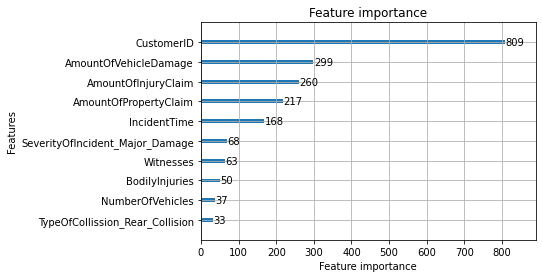

In [152]:
warnings.filterwarnings(action='ignore')
plt.figure(figsize=(20,15))
plot_importance(clf,max_num_features=10 )

## Tensorflow Keras Model interface

In [99]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Input
from keras.models import Model

In [100]:
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

In [101]:
input = Input(shape=(38,))
X = Dense(5, activation='relu', )(input)
output = Dense(1, activation='sigmoid')(X)
model = Model(input, output)
adam = keras.optimizers.Adam(learning_rate=0.00005 )
model.compile(optimizer=adam,  loss='binary_crossentropy', metrics=['accuracy'])

In [102]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 38)]              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 195       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


In [103]:
model.fit(X_train, y_train, epochs=400, batch_size=16, validation_split=0.3 )

Epoch 1/400
945/945 [==============================] - 1s 1ms/step - loss: 889.3613 - accuracy: 0.4360 - val_loss: 390.2538 - val_accuracy: 0.5483
Epoch 2/400
945/945 [==============================] - 1s 1ms/step - loss: 353.4528 - accuracy: 0.5689 - val_loss: 303.0865 - val_accuracy: 0.5929
Epoch 3/400
945/945 [==============================] - 1s 956us/step - loss: 271.7686 - accuracy: 0.5967 - val_loss: 229.1774 - val_accuracy: 0.6048
Epoch 4/400
945/945 [==============================] - 1s 950us/step - loss: 203.4811 - accuracy: 0.6176 - val_loss: 168.7098 - val_accuracy: 0.6470
Epoch 5/400
945/945 [==============================] - 1s 964us/step - loss: 148.5186 - accuracy: 0.6481 - val_loss: 125.4139 - val_accuracy: 0.6839
Epoch 6/400
945/945 [==============================] - 1s 1ms/step - loss: 116.0952 - accuracy: 0.6853 - val_loss: 103.4389 - val_accuracy: 0.6957
Epoch 7/400
945/945 [==============================] - 1s 945us/step - loss: 96.5372 - accuracy: 0.7001 - val_lo

945/945 [==============================] - 1s 984us/step - loss: 0.4884 - accuracy: 0.7958 - val_loss: 0.4799 - val_accuracy: 0.8202
Epoch 58/400
945/945 [==============================] - 1s 968us/step - loss: 0.4809 - accuracy: 0.7991 - val_loss: 0.4163 - val_accuracy: 0.8217
Epoch 59/400
945/945 [==============================] - 1s 1ms/step - loss: 0.4644 - accuracy: 0.8036 - val_loss: 0.5438 - val_accuracy: 0.7408
Epoch 60/400
945/945 [==============================] - 1s 965us/step - loss: 0.4849 - accuracy: 0.7992 - val_loss: 0.4120 - val_accuracy: 0.8271
Epoch 61/400
945/945 [==============================] - 1s 1ms/step - loss: 0.4820 - accuracy: 0.7980 - val_loss: 0.4043 - val_accuracy: 0.8282
Epoch 62/400
945/945 [==============================] - 1s 1ms/step - loss: 0.4741 - accuracy: 0.8009 - val_loss: 0.4056 - val_accuracy: 0.8331
Epoch 63/400
945/945 [==============================] - 1s 1ms/step - loss: 0.5080 - accuracy: 0.7948 - val_loss: 0.4574 - val_accuracy: 0.8211

945/945 [==============================] - 1s 1ms/step - loss: 0.4567 - accuracy: 0.8085 - val_loss: 0.4021 - val_accuracy: 0.8256
Epoch 114/400
945/945 [==============================] - 1s 1ms/step - loss: 0.4610 - accuracy: 0.8093 - val_loss: 0.4317 - val_accuracy: 0.8294
Epoch 115/400
945/945 [==============================] - 1s 958us/step - loss: 0.4673 - accuracy: 0.8091 - val_loss: 0.4073 - val_accuracy: 0.8220
Epoch 116/400
945/945 [==============================] - 1s 988us/step - loss: 0.4666 - accuracy: 0.8083 - val_loss: 0.4011 - val_accuracy: 0.8215
Epoch 117/400
945/945 [==============================] - 1s 1ms/step - loss: 0.4751 - accuracy: 0.8036 - val_loss: 0.4902 - val_accuracy: 0.7749
Epoch 118/400
945/945 [==============================] - 1s 1ms/step - loss: 0.4586 - accuracy: 0.8115 - val_loss: 0.4145 - val_accuracy: 0.8271
Epoch 119/400
945/945 [==============================] - 1s 1ms/step - loss: 0.4770 - accuracy: 0.8062 - val_loss: 0.3984 - val_accuracy: 0.

945/945 [==============================] - 1s 947us/step - loss: 0.4660 - accuracy: 0.8087 - val_loss: 0.5666 - val_accuracy: 0.7274
Epoch 170/400
945/945 [==============================] - 1s 970us/step - loss: 0.4825 - accuracy: 0.8073 - val_loss: 0.4213 - val_accuracy: 0.8232
Epoch 171/400
945/945 [==============================] - 1s 1ms/step - loss: 0.4536 - accuracy: 0.8139 - val_loss: 0.4054 - val_accuracy: 0.8274
Epoch 172/400
945/945 [==============================] - 1s 964us/step - loss: 0.4666 - accuracy: 0.8092 - val_loss: 0.5965 - val_accuracy: 0.8058
Epoch 173/400
945/945 [==============================] - 1s 977us/step - loss: 0.4685 - accuracy: 0.8102 - val_loss: 0.4485 - val_accuracy: 0.8138
Epoch 174/400
945/945 [==============================] - 1s 949us/step - loss: 0.4684 - accuracy: 0.8104 - val_loss: 0.4151 - val_accuracy: 0.8302
Epoch 175/400
945/945 [==============================] - 1s 1ms/step - loss: 0.4816 - accuracy: 0.8058 - val_loss: 0.4173 - val_accura

945/945 [==============================] - 1s 1ms/step - loss: 0.4647 - accuracy: 0.8102 - val_loss: 0.4233 - val_accuracy: 0.8291
Epoch 226/400
945/945 [==============================] - 1s 1ms/step - loss: 0.4639 - accuracy: 0.8106 - val_loss: 0.4332 - val_accuracy: 0.8219
Epoch 227/400
945/945 [==============================] - 1s 1ms/step - loss: 0.4734 - accuracy: 0.8096 - val_loss: 0.4784 - val_accuracy: 0.7882
Epoch 228/400
945/945 [==============================] - 1s 995us/step - loss: 0.4698 - accuracy: 0.8108 - val_loss: 0.4514 - val_accuracy: 0.8260
Epoch 229/400
945/945 [==============================] - 1s 1ms/step - loss: 0.4513 - accuracy: 0.8159 - val_loss: 0.4120 - val_accuracy: 0.8331
Epoch 230/400
945/945 [==============================] - 1s 1ms/step - loss: 0.4682 - accuracy: 0.8098 - val_loss: 0.4504 - val_accuracy: 0.8254
Epoch 231/400
945/945 [==============================] - 1s 1ms/step - loss: 0.4756 - accuracy: 0.8077 - val_loss: 0.4057 - val_accuracy: 0.82

945/945 [==============================] - 1s 963us/step - loss: 0.4705 - accuracy: 0.8094 - val_loss: 0.4183 - val_accuracy: 0.8287
Epoch 282/400
945/945 [==============================] - 1s 1ms/step - loss: 0.4695 - accuracy: 0.8115 - val_loss: 0.4353 - val_accuracy: 0.8225
Epoch 283/400
945/945 [==============================] - 1s 958us/step - loss: 0.4651 - accuracy: 0.8115 - val_loss: 0.4367 - val_accuracy: 0.8217
Epoch 284/400
945/945 [==============================] - 1s 961us/step - loss: 0.4803 - accuracy: 0.8072 - val_loss: 0.5569 - val_accuracy: 0.7393
Epoch 285/400
945/945 [==============================] - 1s 997us/step - loss: 0.4626 - accuracy: 0.8142 - val_loss: 0.4453 - val_accuracy: 0.8266
Epoch 286/400
945/945 [==============================] - 1s 990us/step - loss: 0.4741 - accuracy: 0.8110 - val_loss: 0.4045 - val_accuracy: 0.8297
Epoch 287/400
945/945 [==============================] - 1s 961us/step - loss: 0.4744 - accuracy: 0.8089 - val_loss: 0.4486 - val_accu

945/945 [==============================] - 1s 1ms/step - loss: 0.4700 - accuracy: 0.8077 - val_loss: 0.4000 - val_accuracy: 0.8253
Epoch 338/400
945/945 [==============================] - 1s 1ms/step - loss: 0.4643 - accuracy: 0.8118 - val_loss: 0.4232 - val_accuracy: 0.8222
Epoch 339/400
945/945 [==============================] - 1s 1ms/step - loss: 0.4558 - accuracy: 0.8156 - val_loss: 0.4440 - val_accuracy: 0.8217
Epoch 340/400
945/945 [==============================] - 1s 1ms/step - loss: 0.4819 - accuracy: 0.8069 - val_loss: 0.4191 - val_accuracy: 0.8354
Epoch 341/400
945/945 [==============================] - 1s 1ms/step - loss: 0.4886 - accuracy: 0.8079 - val_loss: 0.5380 - val_accuracy: 0.7830
Epoch 342/400
945/945 [==============================] - 1s 1ms/step - loss: 0.4716 - accuracy: 0.8128 - val_loss: 0.4147 - val_accuracy: 0.8325
Epoch 343/400
945/945 [==============================] - 1s 983us/step - loss: 0.4769 - accuracy: 0.8087 - val_loss: 0.8471 - val_accuracy: 0.62

945/945 [==============================] - 1s 1ms/step - loss: 0.4681 - accuracy: 0.8124 - val_loss: 0.4009 - val_accuracy: 0.8310
Epoch 394/400
945/945 [==============================] - 1s 991us/step - loss: 0.4673 - accuracy: 0.8087 - val_loss: 0.4220 - val_accuracy: 0.8223
Epoch 395/400
945/945 [==============================] - 1s 1ms/step - loss: 0.4626 - accuracy: 0.8116 - val_loss: 0.4259 - val_accuracy: 0.8212
Epoch 396/400
945/945 [==============================] - 1s 1ms/step - loss: 0.4794 - accuracy: 0.8097 - val_loss: 0.6257 - val_accuracy: 0.6998
Epoch 397/400
945/945 [==============================] - 1s 1ms/step - loss: 0.4558 - accuracy: 0.8147 - val_loss: 0.4150 - val_accuracy: 0.8211
Epoch 398/400
945/945 [==============================] - 1s 999us/step - loss: 0.4982 - accuracy: 0.8035 - val_loss: 0.4049 - val_accuracy: 0.8316
Epoch 399/400
945/945 [==============================] - 1s 1ms/step - loss: 0.4757 - accuracy: 0.8061 - val_loss: 0.6717 - val_accuracy: 0.

In [105]:
scores = model.evaluate(X_test, y_test, batch_size=16)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

450/450 [==============================] - 0s 608us/step - loss: 0.3913 - accuracy: 0.8429

accuracy: 84.29%


In [343]:
X_train.to_csv('./X_train.csv', index=False)

In [344]:
y_train.to_csv('./y_train.csv', index=False)

In [345]:
X_test.to_csv('./X_test.csv', index=False)

In [346]:
y_test.to_csv('./y_test.csv', index=False)

## Scikit Learn MLP

In [106]:
from sklearn.neural_network import MLPClassifier

In [134]:
model = MLPClassifier(hidden_layer_sizes=(4,1), activation='logistic',
                      batch_size=128, learning_rate_init=0.0001, alpha=0.01,
                      solver='adam', random_state=2022, max_iter=1000)

In [135]:
y_predict = model.fit(X_train, y_train).predict(X_test)

In [136]:
accuracy_score(y_test, y_predict)

0.8380105584884691

## Training by tensowflow decision forest

In [ ]:
# tensorflow_decision_forests can be installed only in Linux environment. If linumx python env is not available, colab can be a good alternative.

pip install tensorflow_decision_forests

In [ ]:
# Connect to google drive to load dataset file.
from google.colab import drive 
drive.mount('/content/gdrive')

In [ ]:
# Looad tensorflow_decision_forests
import tensorflow_decision_forests as tfdf
import pandas as pd

In [ ]:
X_train = pd.read_csv('gdrive/My Drive/data/ML_study/X_train.csv')
X_train

X_test = pd.read_csv('gdrive/My Drive/data/ML_study/X_test.csv')
X_test

y_train = pd.read_csv('gdrive/My Drive/data/ML_study/y_train.csv')
y_train

y_test = pd.read_csv('gdrive/My Drive/data/ML_study/y_test.csv')

train = pd.concat([X_train, y_train], axis=1)
train

test = pd.concat([X_test, y_test], axis=1)
test

In [ ]:
# Convert the Pandas dataframe to a tf dataset
tf_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(train,label="ReportedFraud")

model = tfdf.keras.RandomForestModel()
model.fit(tf_dataset)

# Evaluate model.
model.compile(metrics=["accuracy"])

# Convert the Pandas dataframe to a tf dataset
tf_test = tfdf.keras.pd_dataframe_to_tf_dataset(test,label="ReportedFraud")
model.evaluate(tf_test)

In [ ]:
model.summary()

## Accuracy report

Evaluation Score(Accuracy) without hyperparameter optimization

Scikit Learn ML model
1. RandomForest : 92.9%
2. HistGradientBoostingClassifier : 93.06%
3. SVC : 88.45%
4. LGBM : 93.26% ( Highest Accuracy )


Tensorflow 

5. tf.keras : 84.29 %
6. Scikit Learn MLP : 83.62%
7. tensowflow Random Forest : 92.08% 

